# YOLO v7 实测

In [3]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 929, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 929 (delta 28), reused 70 (delta 21), pack-reused 845
Receiving objects: 100% (929/929), 68.26 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (453/453), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.3 MB/s 


# 下载训练资料

In [2]:
# https://public.roboflow.com/object-detection/aquarium/2

# from google.colab import files
# files.upload()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls /content/drive/MyDrive/0/OID.*

/content/drive/MyDrive/0/OID.zip


In [5]:
!unzip /content/drive/MyDrive/0/OID.zip -d .

Archive:  /content/drive/MyDrive/0/OID.zip
   creating: ./OID/
   creating: ./OID/csv_folder/
  inflating: ./OID/csv_folder/class-descriptions-boxable.csv  
  inflating: ./OID/csv_folder/test-annotations-bbox.csv  
  inflating: ./OID/csv_folder/train-annotations-bbox.csv  
   creating: ./OID/Dataset/
  inflating: ./OID/Dataset/data.yaml  
   creating: ./OID/Dataset/test/
   creating: ./OID/Dataset/test/Balloon/
 extracting: ./OID/Dataset/test/Balloon/006caaa247155f2d.jpg  
  inflating: ./OID/Dataset/test/Balloon/006caaa247155f2d.txt  
  inflating: ./OID/Dataset/test/Balloon/04ca165294dd7cc9.jpg  
  inflating: ./OID/Dataset/test/Balloon/04ca165294dd7cc9.txt  
  inflating: ./OID/Dataset/test/Balloon/04ce83af21e7c1ef.jpg  
 extracting: ./OID/Dataset/test/Balloon/04ce83af21e7c1ef.txt  
  inflating: ./OID/Dataset/test/Balloon/0a53b25fdd55704b.jpg  
  inflating: ./OID/Dataset/test/Balloon/0a53b25fdd55704b.txt  
  inflating: ./OID/Dataset/test/Balloon/17404fe8484febfa.jpg  
  inflating: ./OID

# 下载 YOLO v7 权重档

In [6]:
# download COCO starting checkpoint
# %cd /content/yolov7
!gdown "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt"

Downloading...
From: https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
To: /content/yolov7/yolov7.pt
100% 75.6M/75.6M [00:02<00:00, 26.6MB/s]


## 模型训练

In [11]:
import datetime
start = datetime.datetime.now()
start

datetime.datetime(2022, 9, 7, 12, 29, 31, 169721)

In [12]:
# run this cell to begin training
!python train.py --batch 4 --cfg cfg/training/yolov7.yaml --img 640 --epochs 55 --data ./OID/Dataset/data.yaml --weights '' --name yolov7 --hyp data/hyp.scratch.p5.yaml --device 0 

YOLOR ߚ࠶0.1-107-g44d8ab4 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='./OID/Dataset/data.yaml', device='0', entity=None, epochs=55, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov73', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.

In [13]:
print(datetime.datetime.now())
print((datetime.datetime.now() - start).total_seconds())

2022-09-07 13:53:36.603262
5045.433676


In [16]:
print((datetime.datetime.now() - start).total_seconds()/60)

85.38703081666667


# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

In [23]:
ls ./runs/train/

yolov7/  yolov72/  yolov73/


In [17]:
ls ./runs/train/yolov7/weights/

init.pt


In [25]:
from google.colab import files

files.download('./runs/train/yolov73/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
# Run evaluation
!python detect.py --weights ./runs/train/yolov73/weights/best.pt --conf 0.03 --source ./OID/Dataset/test/Balloon/76e41712939b97f2.jpg


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='./OID/Dataset/test/Balloon/76e41712939b97f2.jpg', update=False, view_img=False, weights=['./runs/train/yolov73/weights/best.pt'])
YOLOR ߚ࠶0.1-107-g44d8ab4 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_modul

In [32]:
ls /content/yolov7/runs/detect/

exp/  exp2/


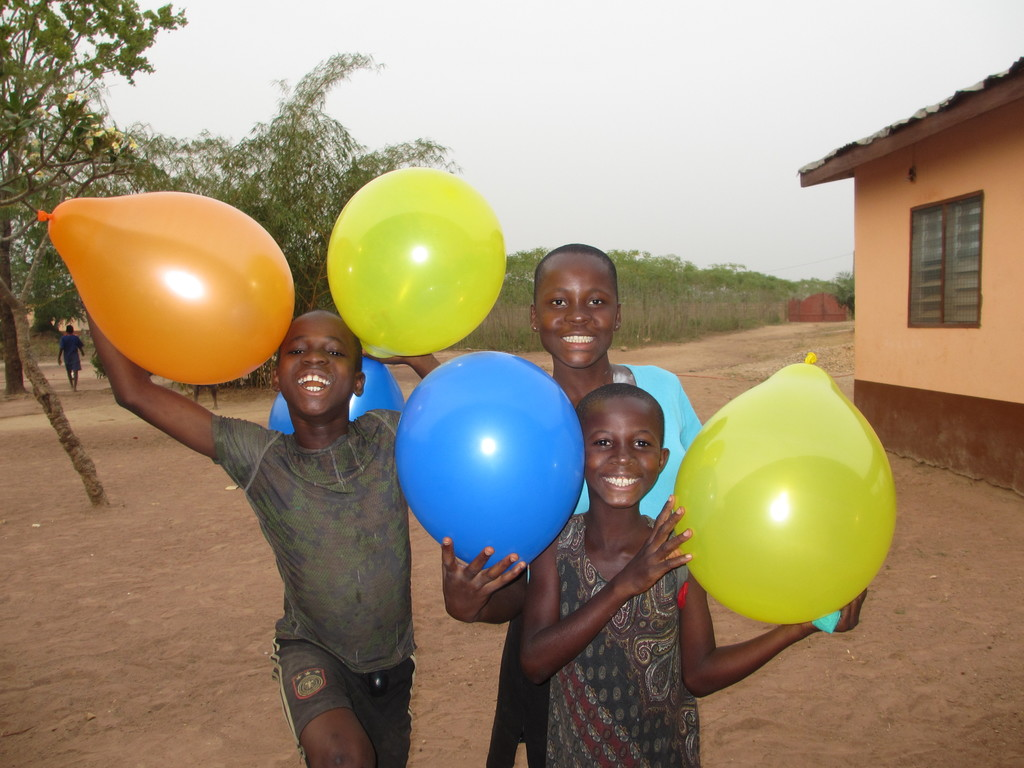

In [33]:
from IPython.display import Image, display
imageName='./OID/Dataset/test/Balloon/76e41712939b97f2.jpg'
display(Image(filename=imageName))

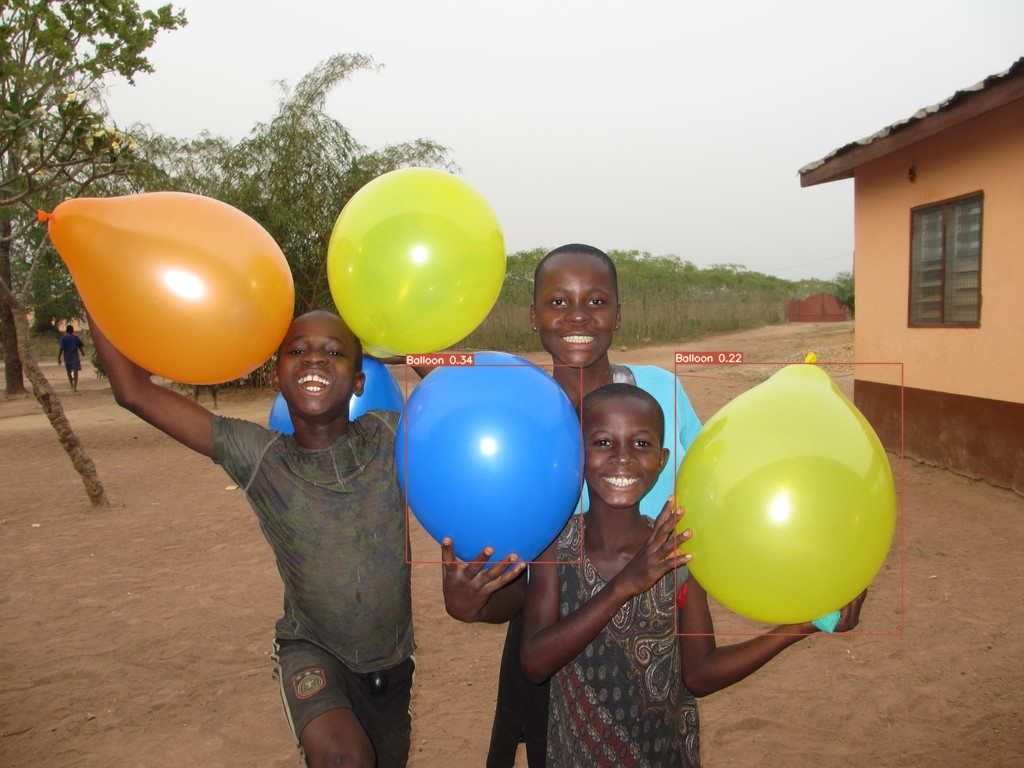

In [34]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7/runs/detect/exp2/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
    